In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pandas_profiling

import warnings
warnings.filterwarnings('ignore')

### Leitura do dataset

In [3]:
df = pd.read_csv('data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

### Análise do dataset

In [4]:
# Dataset possui 569 linhas e 22 colunas
df.shape

(569, 33)

In [5]:
# Listagem das colunas
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
# Listagem do tipo de cada uma das colunas
# 30 variáveis float, 1 variável string (target) e 1 variável ID
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

### Removendo colunas desnecessárias

In [7]:
# Essa coluna só possui valores NAN, logo pode ser removida
df['Unnamed: 32'].unique()

array([nan])

In [8]:
df.drop(columns='Unnamed: 32', inplace=True)

In [9]:
# A coluna id pode ser removida pois são todos valores diferentes
len(df.id.unique())

569

In [10]:
df.drop(columns='id', inplace=True)

In [11]:
# As colunas foram removidas do dataset
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
df.shape

(569, 31)

### Análise Exploratória

In [13]:
# Variável que representa a saída da classe (M = Maligno, B = Benigno)
target = df.columns[0]
target

'diagnosis'

In [14]:
# Transformação da variável alvo
df[target] = df[target].map({'M': 1, 'B': 0})
y = df[target]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [15]:
# Demais variáveis do modelo
features = df.columns[1:,].tolist()
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [16]:
X =df[features]
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean           ...             radius_worst  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [17]:
# Lista com os nomes originais das features (sem _mean, _se e _worst)
original_features_names = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal_dimension']
original_features_names

['radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave points',
 'symmetry',
 'fractal_dimension']

**Análise descritiva das colunas (média, mediana, std...)**

In [18]:
for feature in original_features_names:
    print(X[[str(feature)+'_mean', str(feature)+'_worst', str(feature)+'_se']].describe())
    print()

       radius_mean  radius_worst   radius_se
count   569.000000    569.000000  569.000000
mean     14.127292     16.269190    0.405172
std       3.524049      4.833242    0.277313
min       6.981000      7.930000    0.111500
25%      11.700000     13.010000    0.232400
50%      13.370000     14.970000    0.324200
75%      15.780000     18.790000    0.478900
max      28.110000     36.040000    2.873000

       texture_mean  texture_worst  texture_se
count    569.000000     569.000000  569.000000
mean      19.289649      25.677223    1.216853
std        4.301036       6.146258    0.551648
min        9.710000      12.020000    0.360200
25%       16.170000      21.080000    0.833900
50%       18.840000      25.410000    1.108000
75%       21.800000      29.720000    1.474000
max       39.280000      49.540000    4.885000

       perimeter_mean  perimeter_worst  perimeter_se
count      569.000000       569.000000    569.000000
mean        91.969033       107.261213      2.866059
std        

**Avaliação da distribuiçao da variável alvo**

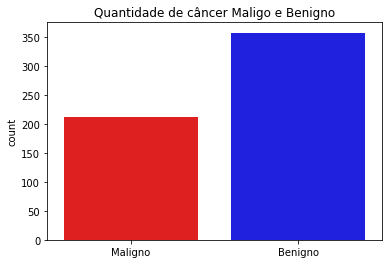

Maligno 37.26 %
Benigno 62.74 %


In [23]:
labels = ['Maligno' if label == 1 else 'Benigno' for label in y]
palette = {'Maligno': 'red', 'Benigno': 'blue'}

# Existe mais tipos Benigno do que Maligno
ax = sns.countplot(labels, palette=palette)
plt.title('Quantidade de câncer Maligo e Benigno')
plt.show()

porcentagem_tipos = y.value_counts(normalize=True)*100
print('Maligno', round(porcentagem_tipos[1],2), '%')
print('Benigno', round(porcentagem_tipos[0],2), '%')

**Verificação para existência de dados faltantes**

In [24]:
# Nenhuma coluna possui dados faltantes
X.isnull().any()

radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_dimension_worst    False
dtype: boo

**Gráficos de dispersão, histogramas, e boxplots.**

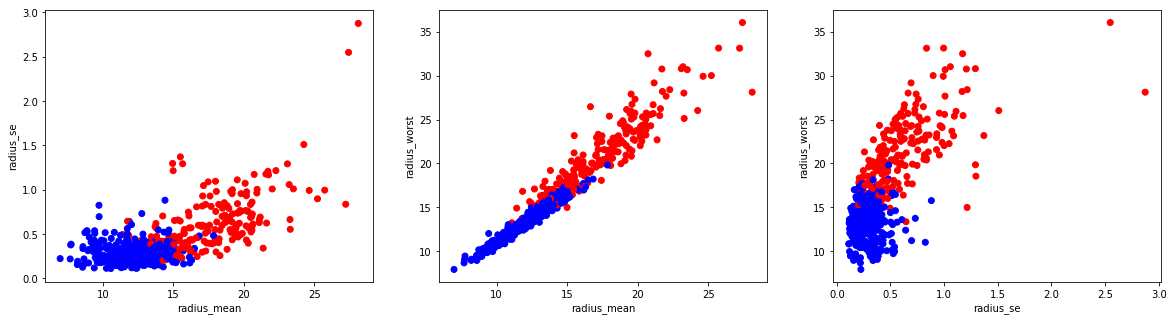

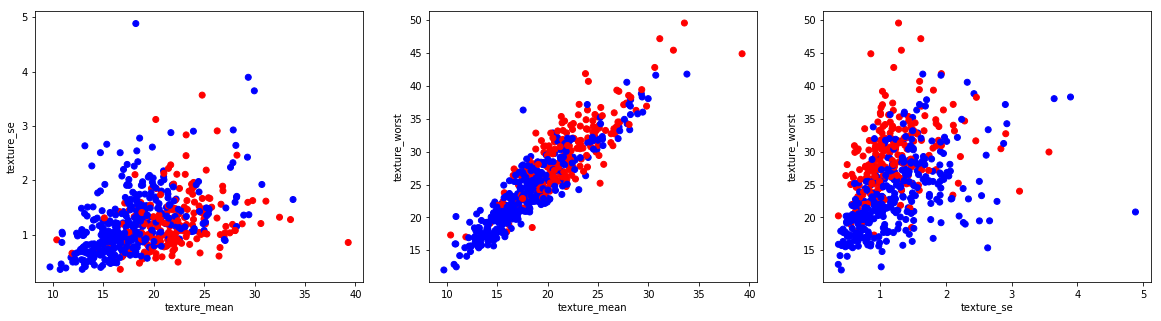

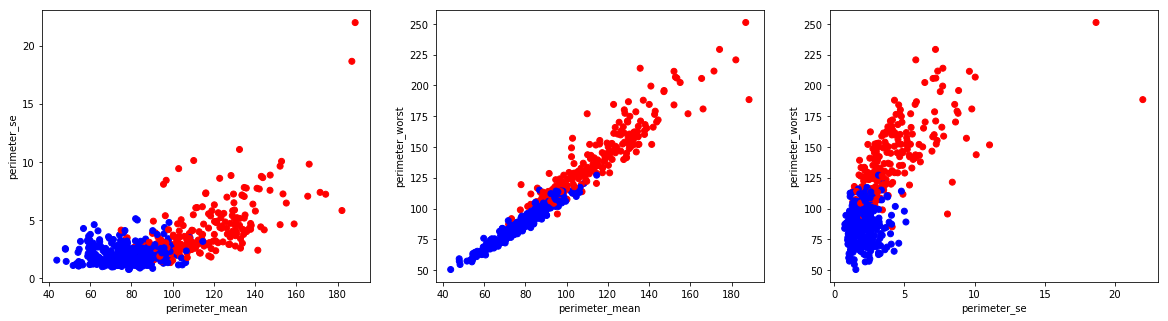

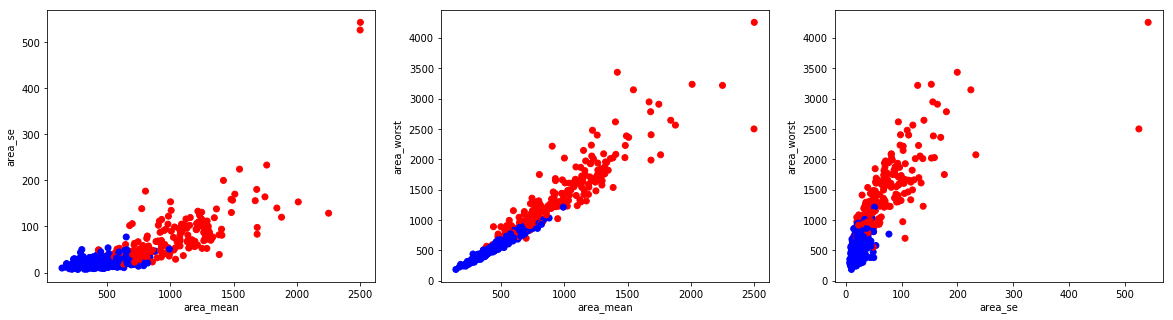

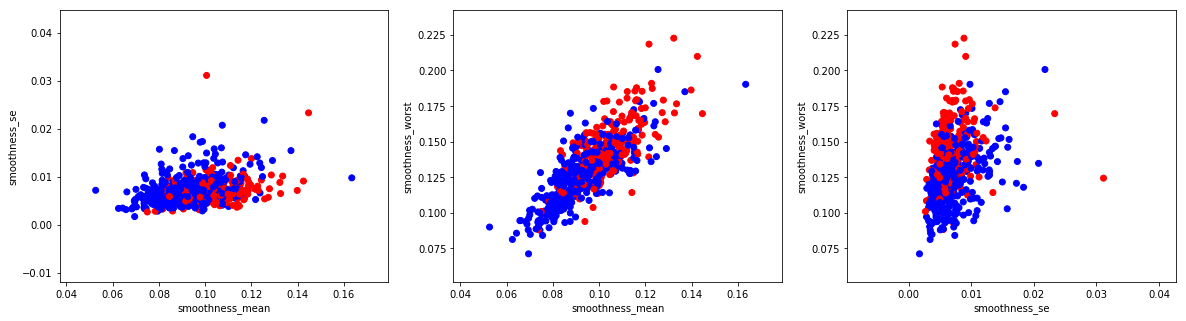

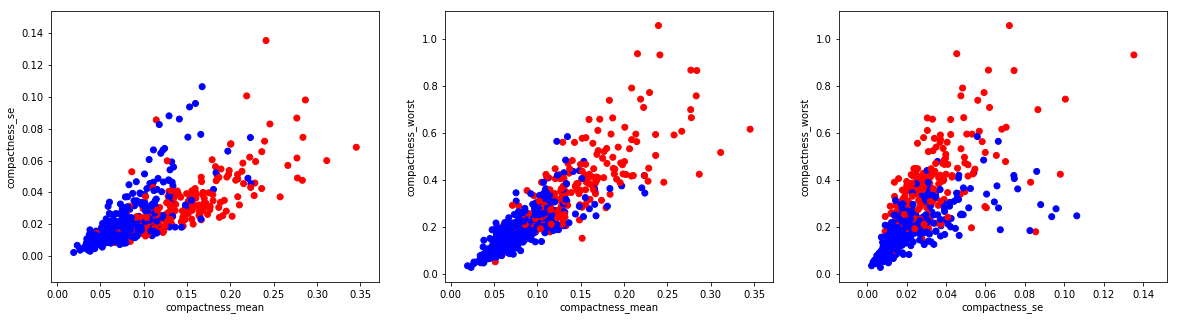

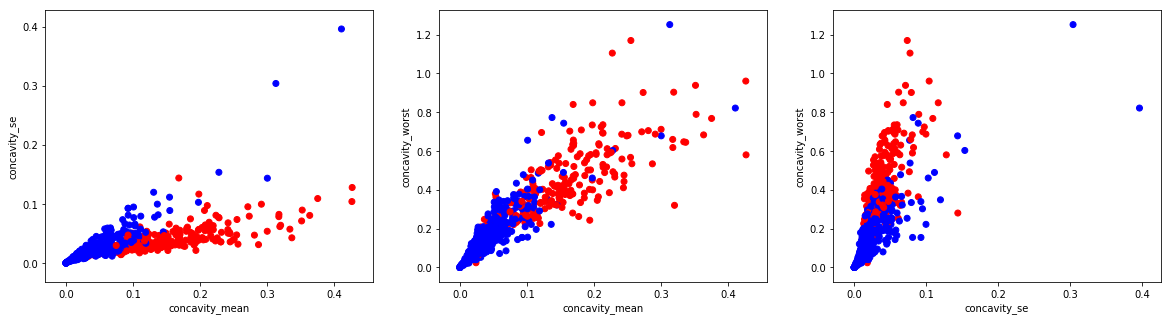

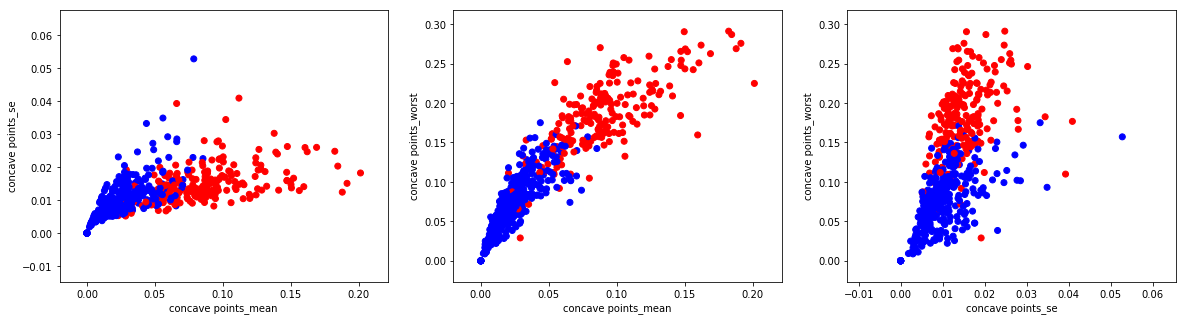

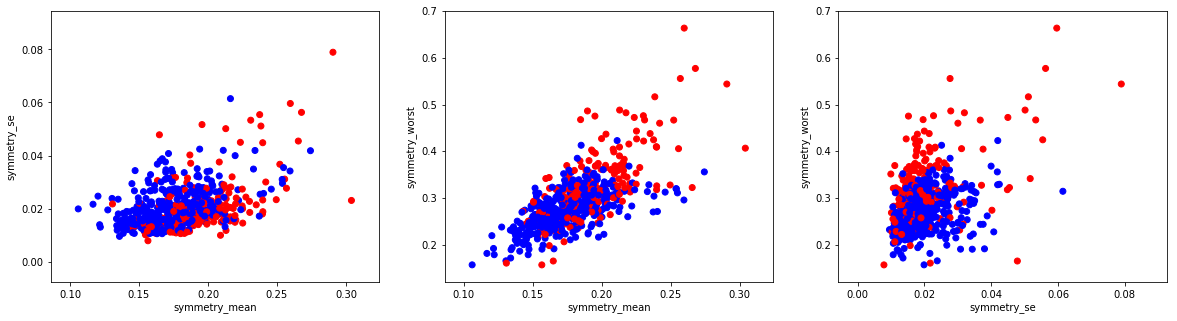

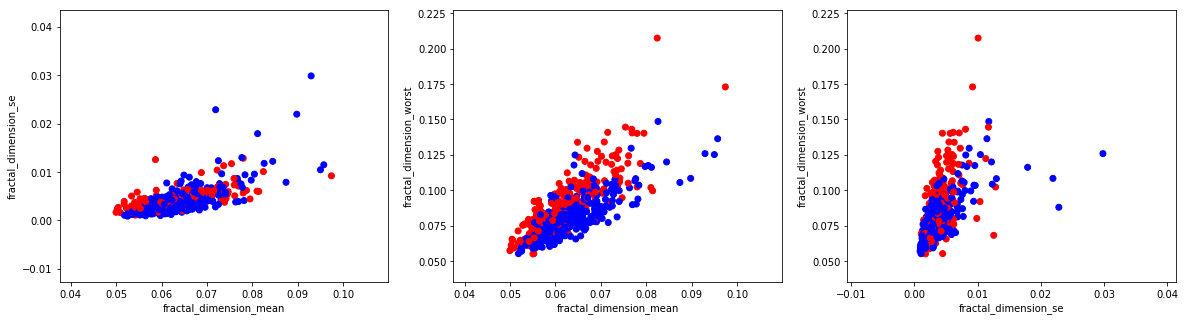

In [25]:
# Análise da dispersão entre as variações da mesma feature (mean, worst e se)

# É possível verificar que existe uma separação perceptível entre os tipos de cancer para as features:
# radius, perimeter, area, concavity e concave_points

# Cor vermelha = Cancer Maligno
# Cor azul = Cancer Benigno
color= ['red' if label == 1 else 'blue' for label in y]

for feature in original_features_names:
    
    plt.figure(figsize=[20,5])
    
    plt.subplot(1, 3, 1)
    plt.scatter(X["{}{}".format(feature, "_mean")], X["{}{}".format(feature, "_se")], c=color)
    plt.xlabel("{}{}".format(feature, "_mean"))
    plt.ylabel("{}{}".format(feature, "_se"))    
    
    plt.subplot(1, 3, 2)
    plt.scatter(X["{}{}".format(feature, "_mean")], X["{}{}".format(feature, "_worst")], c=color)
    plt.xlabel("{}{}".format(feature, "_mean"))
    plt.ylabel("{}{}".format(feature, "_worst"))
    
    plt.subplot(1, 3, 3)
    plt.scatter(X["{}{}".format(feature, "_se")], X["{}{}".format(feature, "_worst")], c=color)
    plt.xlabel("{}{}".format(feature, "_se"))
    plt.ylabel("{}{}".format(feature, "_worst"))
    
    plt.show()

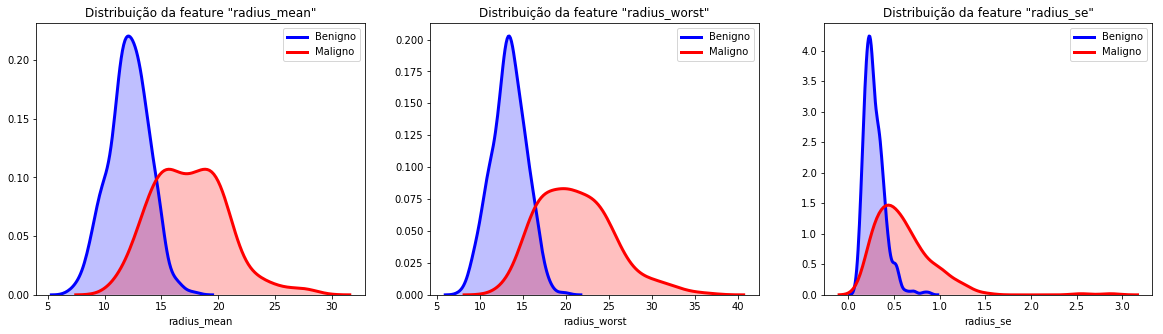

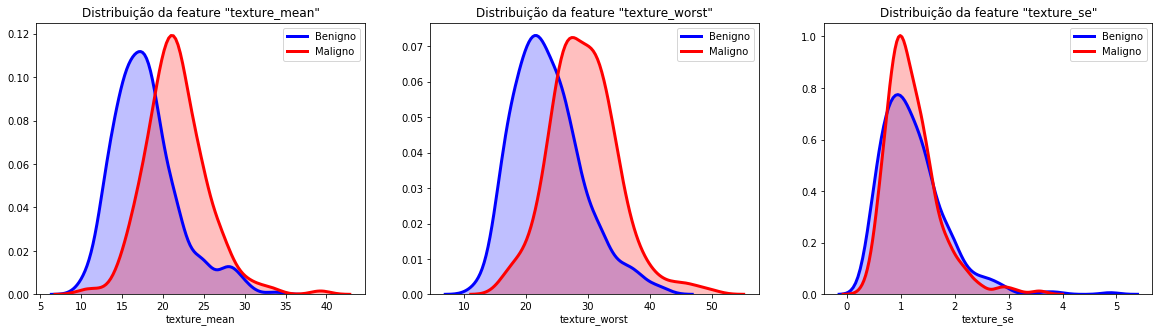

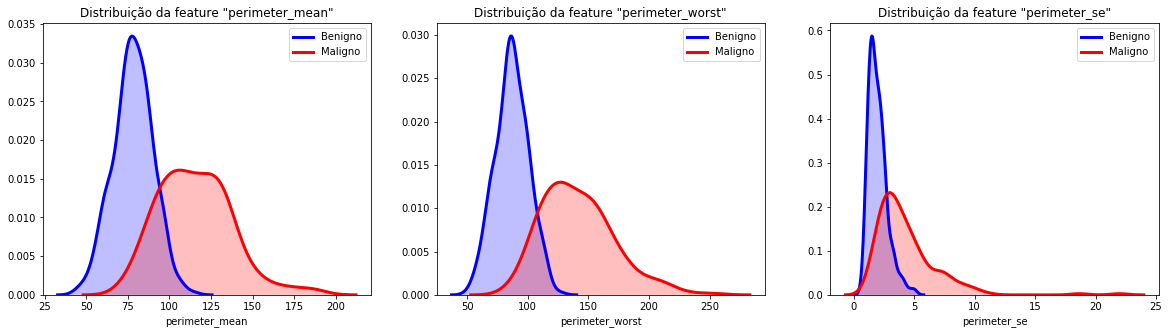

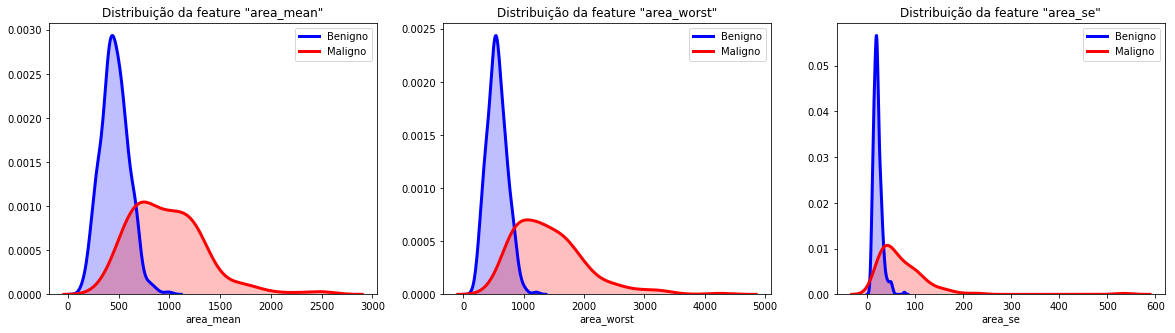

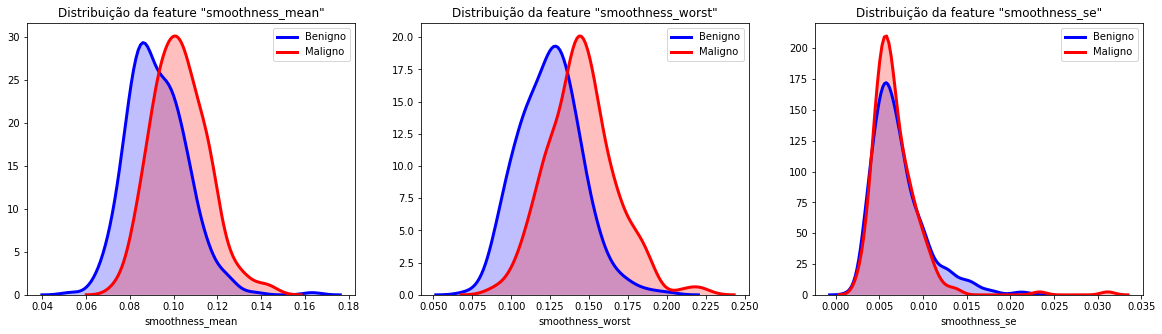

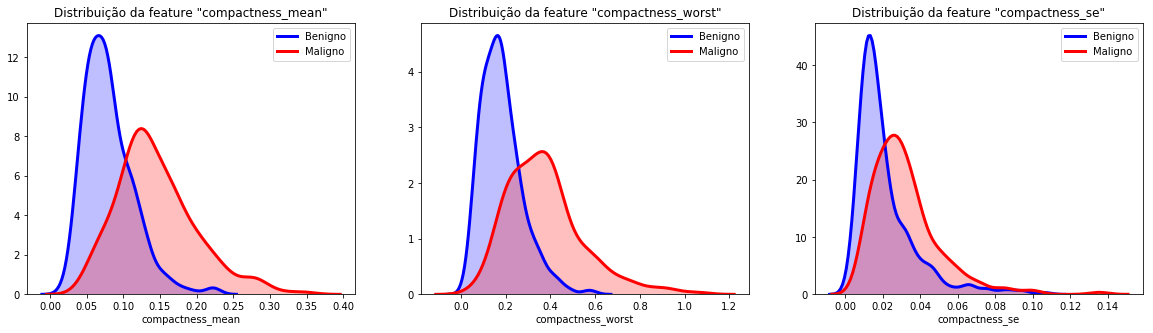

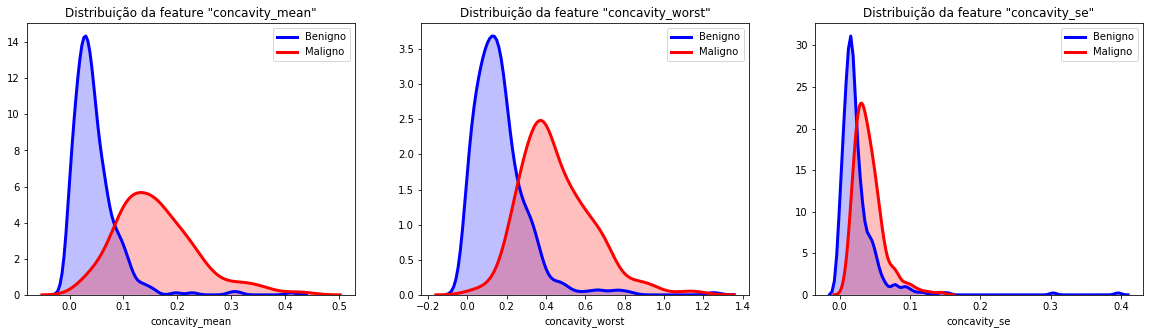

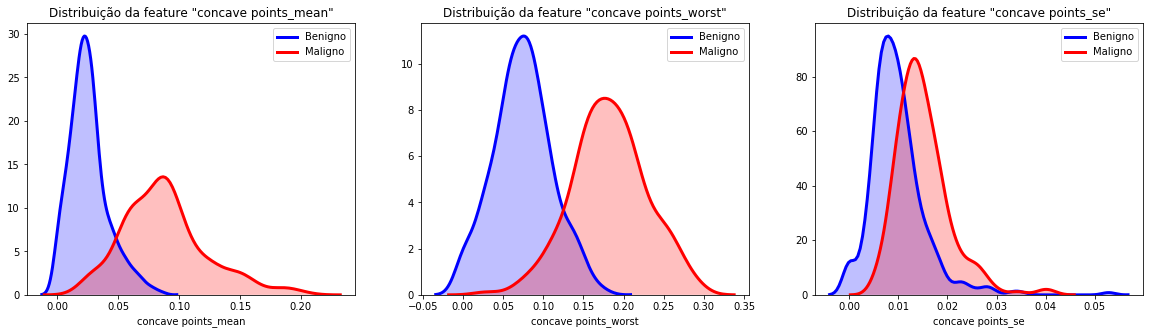

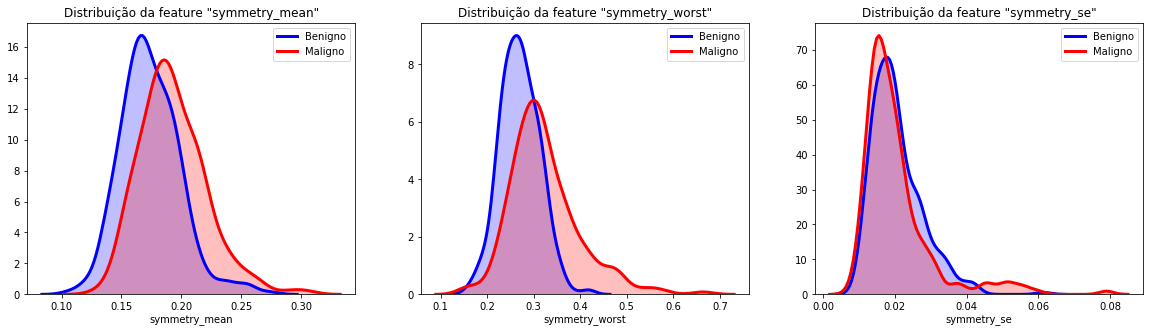

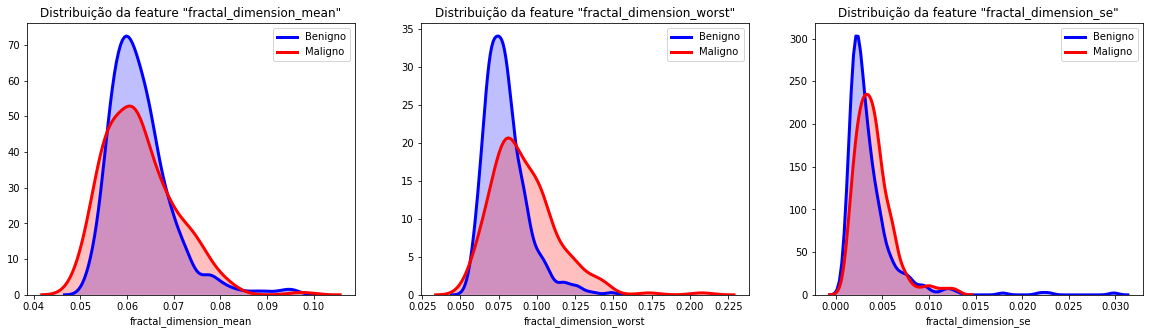

In [26]:
# Análise da distribuição entre as variações da mesma feature (mean, worst e se)

# Novamente é possível verificar que existe uma separação perceptível entre os tipos de cancer para as features:
# radius, perimeter, area, concavity e concave_points

# Features texture, smoothness e symmetry tem os tipos de cancer muito parecidos, quase que se sobrepondo nos graficos

for feature in original_features_names:
    
    plt.figure(figsize=[20,5])
    
    plt.subplot(1, 3, 1)    
    sns.distplot(X["{}{}".format(feature, "_mean")][y==0], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = 'Benigno', color='blue')
    sns.distplot(X["{}{}".format(feature, "_mean")][y==1], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = 'Maligno', color='red')
    plt.title('Distribuição da feature "{}{}"'.format(feature, "_mean"))
    
    
    plt.subplot(1, 3, 2)
    sns.distplot(X["{}{}".format(feature, "_worst")][y==0], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = 'Benigno', color='blue')
    sns.distplot(X["{}{}".format(feature, "_worst")][y==1], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = 'Maligno', color='red')
    plt.title('Distribuição da feature "{}{}"'.format(feature, "_worst"))
    
    plt.subplot(1, 3, 3)
    sns.distplot(X["{}{}".format(feature, "_se")][y==0], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = 'Benigno', color='blue')
    sns.distplot(X["{}{}".format(feature, "_se")][y==1], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3}, label = 'Maligno', color='red')
    plt.title('Distribuição da feature "{}{}"'.format(feature, "_se"))
    
    plt.show()

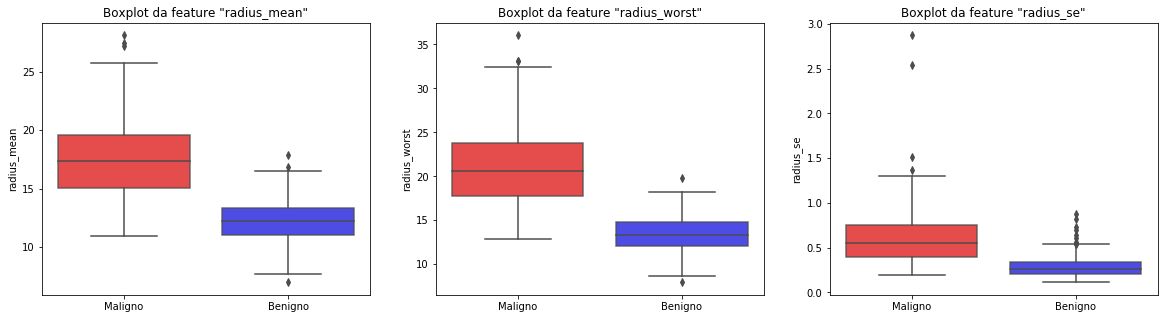

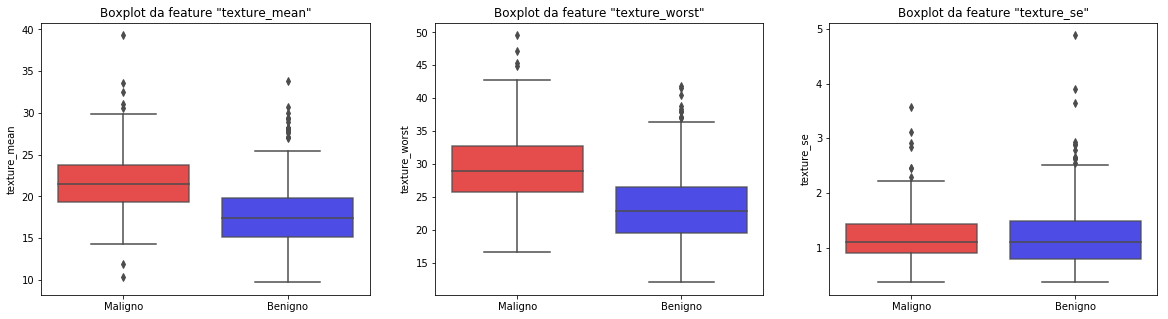

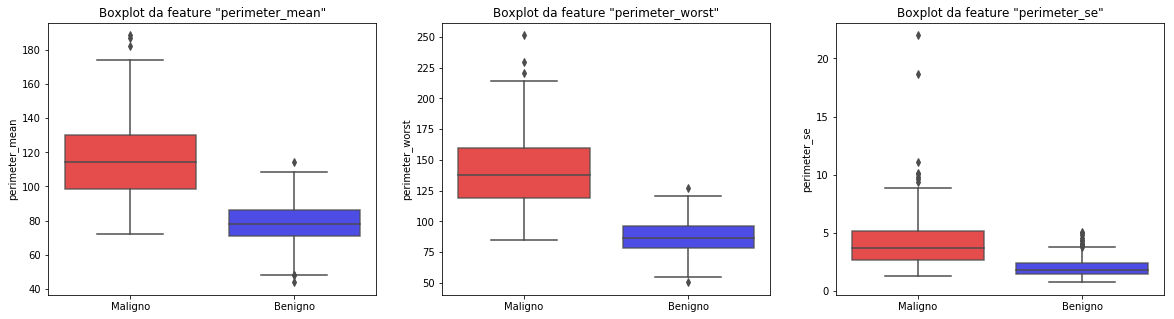

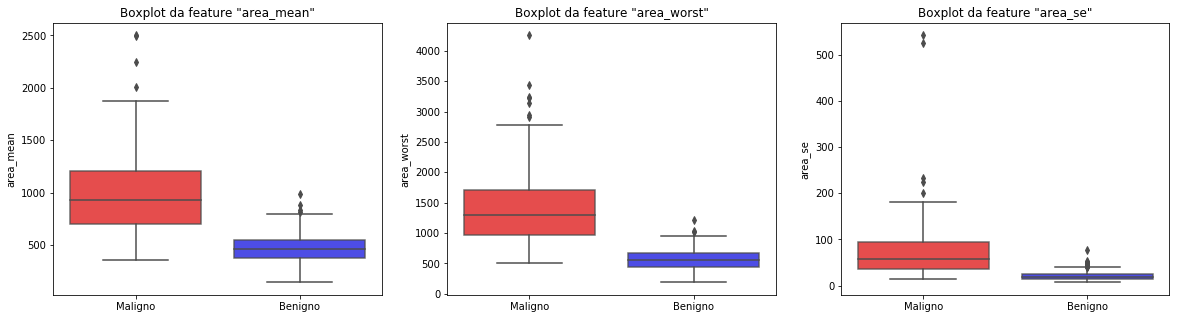

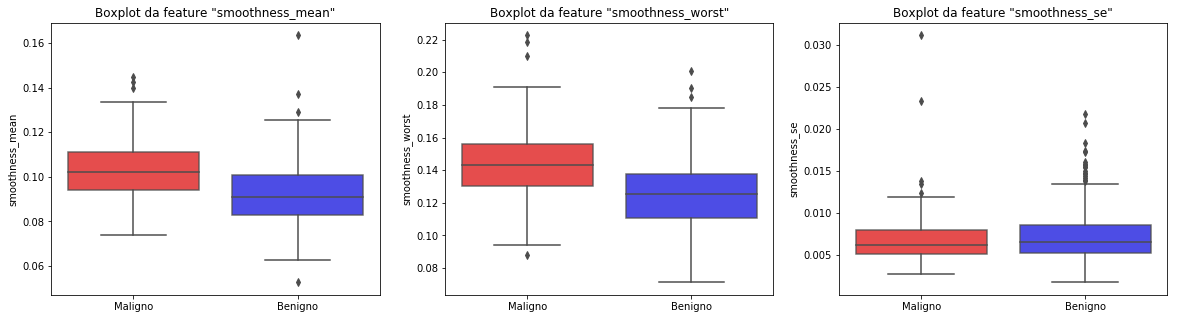

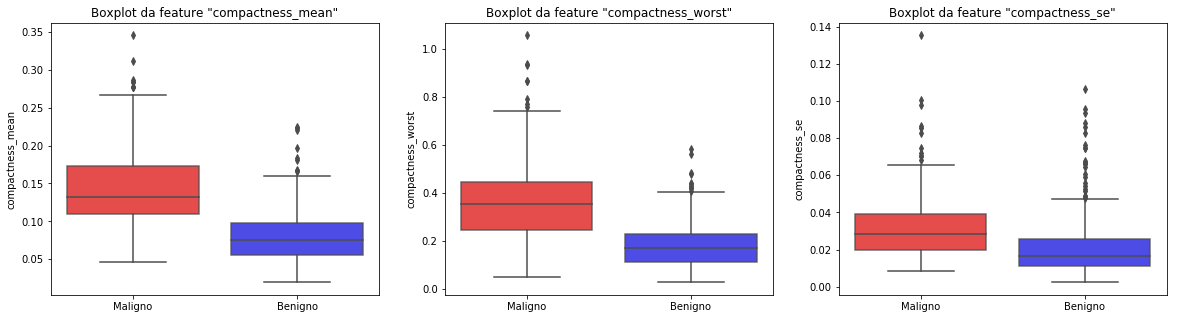

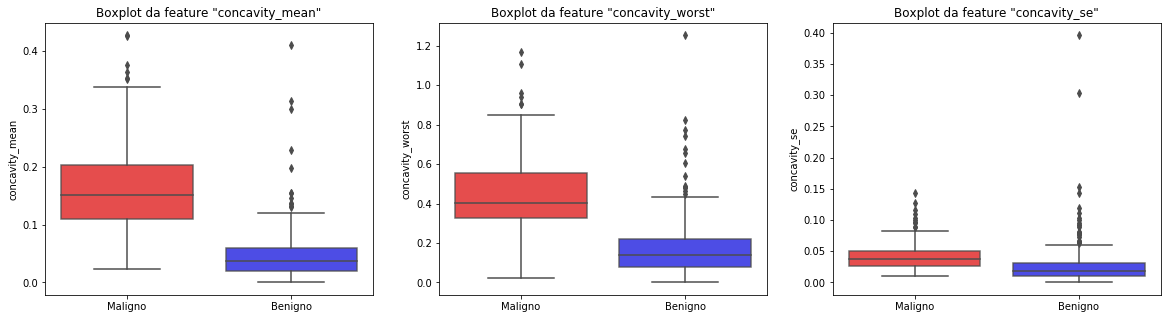

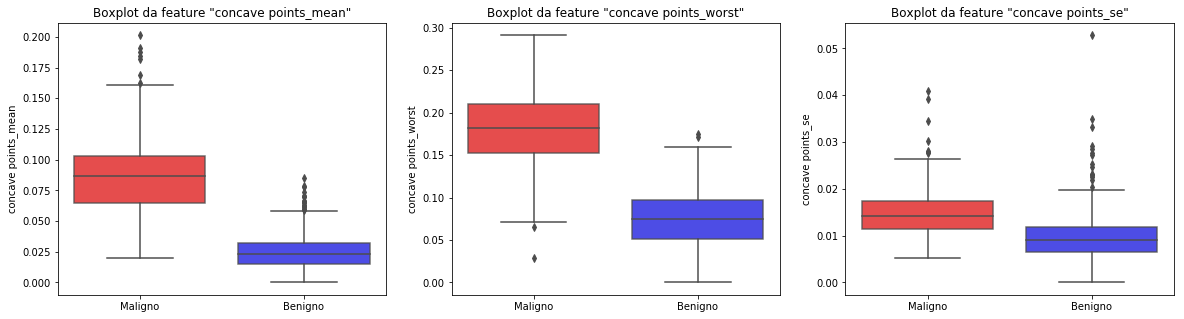

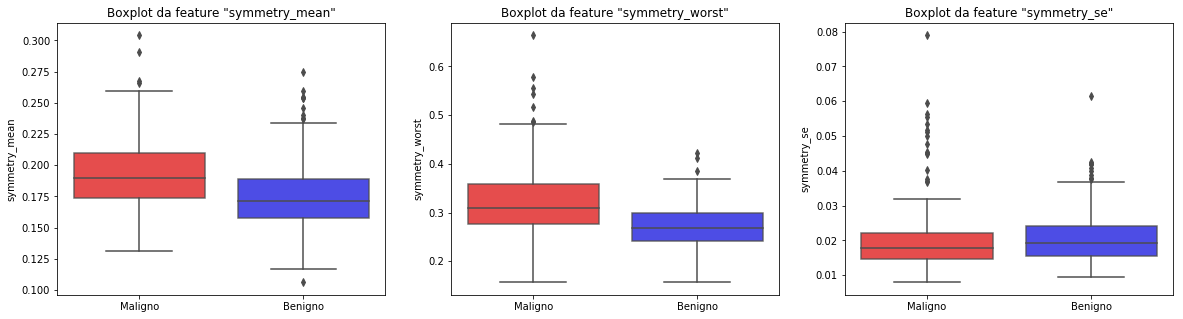

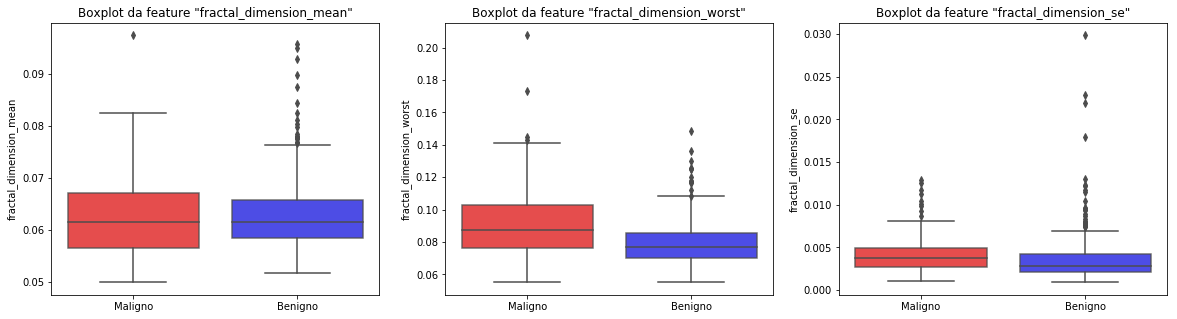

In [27]:
# Análise dos boxplot entre as variações da mesma feature (mean, worst e se)

# Praticamente todas as features com variação _mean e _worst tem a concentração dos valores para câncer maligno
# maiores que os do tipo benigno

# Novamente é possível verificar que existe uma separação perceptível entre os tipos de cancer para as features:
# radius, perimeter, area, concavity e concave_points

# Todas as features possuem outliers
    
for feature in original_features_names:
    
    plt.figure(figsize=[20,5])
    
    plt.subplot(1, 3, 1)
    sns.boxplot(labels, X["{}{}".format(feature, "_mean")], palette=palette, boxprops=dict(alpha=0.8))
    plt.title('Boxplot da feature "{}{}"'.format(feature, "_mean"))
    
    plt.subplot(1, 3, 2)    
    sns.boxplot(labels, X["{}{}".format(feature, "_worst")], palette=palette, boxprops=dict(alpha=0.8))
    plt.title('Boxplot da feature "{}{}"'.format(feature, "_worst"))
    
    plt.subplot(1, 3, 3)
    sns.boxplot(labels, X["{}{}".format(feature, "_se")], palette=palette, boxprops=dict(alpha=0.8))
    plt.title('Boxplot da feature "{}{}"'.format(feature, "_se"))
    
    plt.show()

**Verificação dos outliers**

In [28]:
# Valores acima de vl_max_outlier e menores que vl_min_outlier são considerados outliers

def valor_limite_min_outlier(data, feature):
    return np.mean(data[feature]) - 2 * np.std(data[feature])

def valor_limite_max_outlier(data, feature):
    return np.mean(data[feature]) + 2 * np.std(data[feature])

In [29]:
for feature in features:
    vl_min = valor_limite_min_outlier(X, feature)
    vl_max = valor_limite_max_outlier(X, feature)
        
    print("Outliers da feature {}".format(feature))
    print("Abaixo de {}".format(vl_min), "\n", sorted(X[X[feature] < vl_min][feature].values))
    print("Acima de {}".format(vl_max), "\n", sorted(X[X[feature] > vl_max][feature].values))
    print("-"*100)

Outliers da feature radius_mean
Abaixo de 7.085390218472438 
 [6.981]
Acima de 21.16919326131669 
 [21.37, 21.56, 21.61, 21.71, 21.75, 22.01, 22.27, 23.09, 23.21, 23.27, 23.29, 23.51, 24.25, 24.63, 25.22, 25.73, 27.22, 27.42, 28.11]
----------------------------------------------------------------------------------------------------
Outliers da feature texture_mean
Abaixo de 10.695139231970328 
 [9.71, 10.38]
Acima de 27.88415778033201 
 [28.03, 28.06, 28.08, 28.14, 28.2, 28.21, 28.23, 28.25, 28.77, 28.92, 29.29, 29.33, 29.37, 29.43, 29.81, 29.97, 30.62, 30.72, 31.12, 32.47, 33.56, 33.81, 39.28]
----------------------------------------------------------------------------------------------------
Outliers da feature perimeter_mean
Abaixo de 43.41379480580931 
 []
Acima de 140.524271978022 
 [140.9, 141.3, 142.0, 142.7, 143.0, 143.7, 144.4, 147.2, 147.3, 152.1, 152.1, 152.8, 153.5, 155.1, 158.9, 165.5, 166.2, 171.5, 174.2, 182.1, 186.9, 188.5]
----------------------------------------------

**Análise da correlação entre as variáveis**

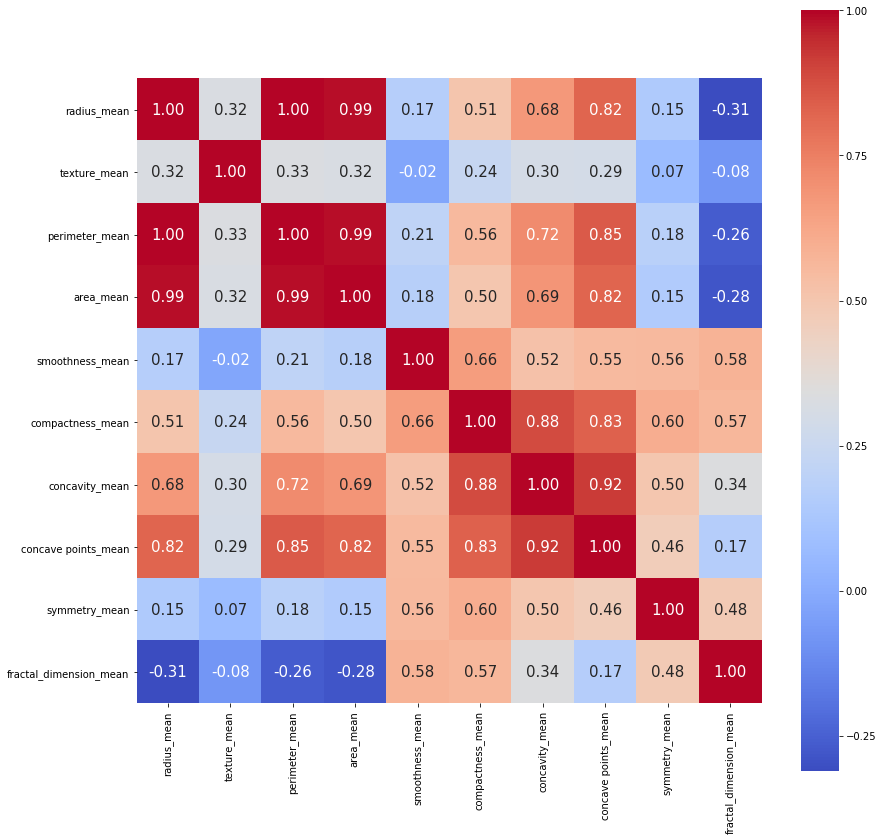

In [30]:
# Correlação entre as variáveis Mean

# As variáveis radius, perimeter e area estão fortemente correlacionadas
# As variáveis compactness, concavity e concave points também estão bastante correlacionadas

features_mean = X[["{}_mean".format(feature) for feature in original_features_names]]

correlacao = features_mean.corr()
plt.figure(figsize=(14,14))

sns.heatmap(correlacao, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 15}, cmap='coolwarm')
plt.show()

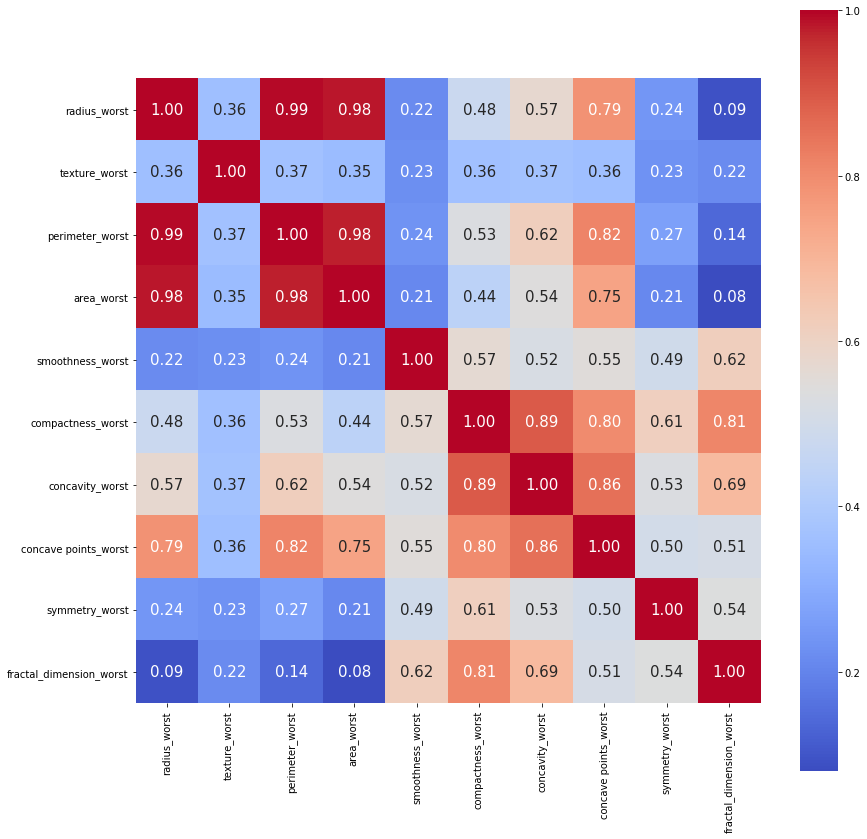

In [31]:
# Correlação entre as variáveis Worst

# As variáveis radius, perimeter e area estão fortemente correlacionadas
# As variáveis compactness, concavity e concave points também estão bastante correlacionadas

features_worst = X[["{}_worst".format(feature) for feature in original_features_names]]

correlacao = features_worst.corr()
plt.figure(figsize=(14,14))

sns.heatmap(correlacao, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 15}, cmap='coolwarm')
plt.show()

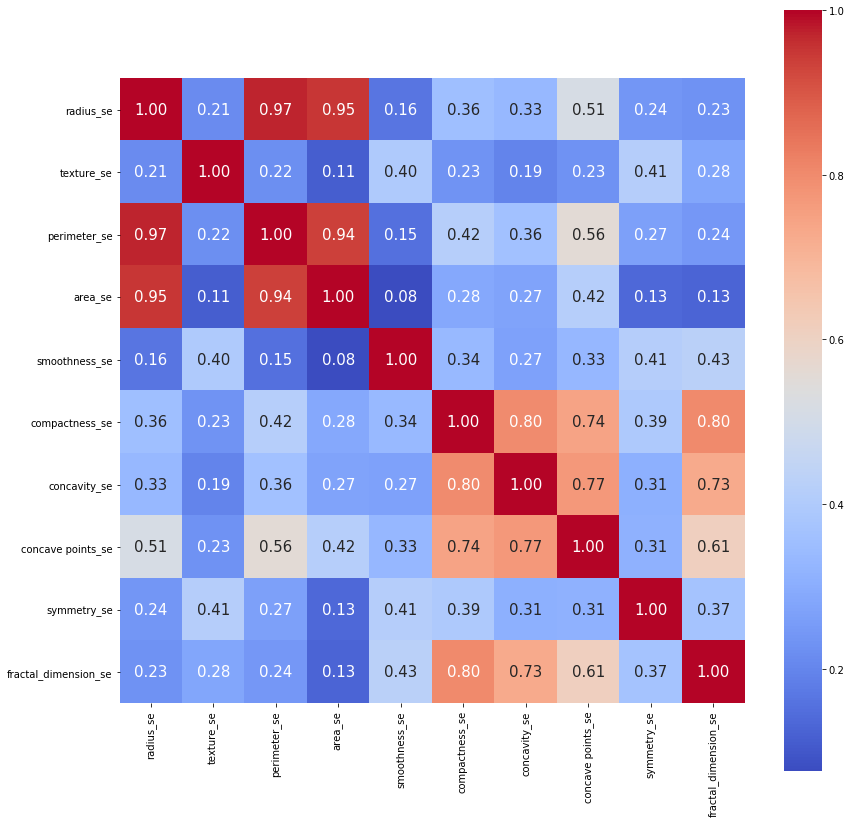

In [32]:
# Correlação entre as variáveis Se

# As variáveis radius, perimeter e area estão fortemente correlacionadas
# As variáveis compactness, concavity e concave points também estão bastante correlacionadas

features_se = X[["{}_se".format(feature) for feature in original_features_names]]

correlacao = features_se.corr()
plt.figure(figsize=(14,14))

sns.heatmap(correlacao, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 15}, cmap='coolwarm')
plt.show()

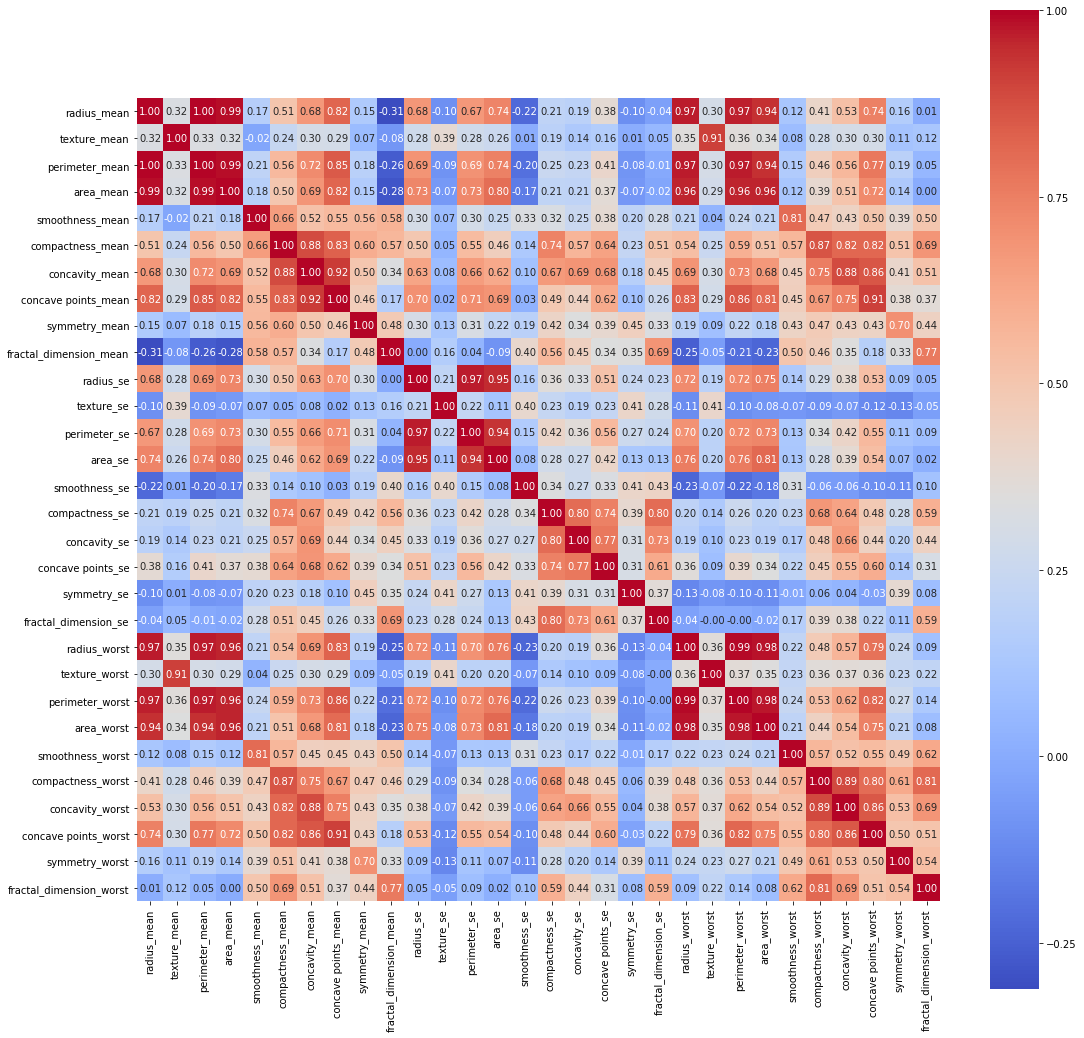

In [33]:
# Correlação entre todas as variáveis

# As features mean e worst estão com forte correlação
# As variáveis radius, perimeter e area estão fortemente correlacionadas entre mean e worst
# As variáveis compactness, concavity e concave points também estão bastante correlacionadas entre mean e worst

correlacao = X.corr()
plt.figure(figsize=(18,18))

sns.heatmap(correlacao, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 10}, cmap='coolwarm')
plt.show()

In [36]:
# Análise do dataset com a biblioteca pandas_profiling
# Essa nos fornecesse várias informações sobre as variáveis que compoem o dataset
# Deste informações como dados faltantes, valores zerados, correlação entre variáveis, etc
profile = pandas_profiling.ProfileReport(X)
profile

In [38]:
# Segundo análise da biblioteca pandas_profiling, várias variáveis estão fortemente correlacionadas, 
# como já tinha sido analisado anteriormente com os gráficos de distribuição e dispersão
variaveis_rejeitadas = profile.get_rejected_variables()
variaveis_rejeitadas

['area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst']

In [29]:
# Analisando todos os plots acima, ao meu ver o grupo de variáveis "mean" 
# são mais interessantes para testar acurácia

In [39]:
# X com todas variáveis
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean           ...             radius_worst  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

In [40]:
# X com StandardScaler
X_st = pd.DataFrame(np.c_[StandardScaler().fit(X, y).transform(X)])
X_st.head()

0         1         2         3         4         5         6   \
0  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   

         7         8         9     ...           20        21        22  \
0  2.532475  2.217515  2.255747    ...     1.886690 -1.359293  2.303601   
1  0.548144  0.001392 -0.868652    ...     1.805927 -0.369203  1.535126   
2  2.037231  0.939685 -0.398008    ...     1.511870 -0.023974  1.347475   
3  1.451707  2.867383  4.910919    ...    -0.281464  0.133984 -0.249939   
4  1.428493 -0.009560 -0.562450    ...     1.298575 -1.466770  1.338539   

         23        24        25        26        27        28        29  
0  2.001237  1.307686  2.616665  2.109526  2.296076  2.750622  1.937015  
1  1.890489 -0.375612 -0.430444 -0.146749  1.087084 -0.243890  0.281190  
2  1.456285  0.527407  1.082932  0.854974  1.955000  1.152255  0.201391  
3 -0.550021  3.394275  3.893397  1.989588  2.175786  6.046041  4.935010  
4  1.220724  0.220556 -0.313395  0.613179  0.729259 -0.868353 -0.397100  

[5 rows x 30 columns]

In [42]:
# X SEM as variaveis rejeitadas
X_without_rejected = X.drop(columns=variaveis_rejeitadas)
X_without_rejected.head()

radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0        17.99         10.38          0.11840           0.27760   
1        20.57         17.77          0.08474           0.07864   
2        19.69         21.25          0.10960           0.15990   
3        11.42         20.38          0.14250           0.28390   
4        20.29         14.34          0.10030           0.13280   

   concavity_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0          0.3001         0.2419                 0.07871     1.0950   
1          0.0869         0.1812                 0.05667     0.5435   
2          0.1974         0.2069                 0.05999     0.7456   
3          0.2414         0.2597                 0.09744     0.4956   
4          0.1980         0.1809                 0.05883     0.7572   

   texture_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0      0.9053       0.006399         0.04904       0.05373            0.01587   
1      0.7339       0.005225         0.01308       0.01860            0.01340   
2      0.7869       0.006150         0.04006       0.03832            0.02058   
3      1.1560       0.009110         0.07458       0.05661            0.01867   
4      0.7813       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  smoothness_worst  compactness_worst  \
0      0.03003              0.006193            0.1622             0.6656   
1      0.01389              0.003532            0.1238             0.1866   
2      0.02250              0.004571            0.1444             0.4245   
3      0.05963              0.009208            0.2098             0.8663   
4      0.01756              0.005115            0.1374             0.2050   

   concavity_worst  symmetry_worst  fractal_dimension_worst  
0           0.7119          0.4601                  0.11890  
1           0.2416          0.2750                  0.08902  
2           0.4504          0.3613                  0.08758  
3           0.6869          0.6638                  0.17300  
4           0.4000          0.2364                  0.07678

In [52]:
# X SEM as variaveis rejeitadas com StandardScaler
X_without_rejected_st = pd.DataFrame(np.c_[StandardScaler().fit(X_without_rejected, y).transform(X_without_rejected)])
X_without_rejected_st.head()

0         1         2         3         4         5         6   \
0  1.097064 -2.073335  1.568466  3.283515  2.652874  2.217515  2.255747   
1  1.829821 -0.353632 -0.826962 -0.487072 -0.023846  0.001392 -0.868652   
2  1.579888  0.456187  0.942210  1.052926  1.363478  0.939685 -0.398008   
3 -0.768909  0.253732  3.283553  3.402909  1.915897  2.867383  4.910919   
4  1.750297 -1.151816  0.280372  0.539340  1.371011 -0.009560 -0.562450   

         7         8         9         10        11        12        13  \
0  2.489734 -0.565265 -0.214002  1.316862  0.724026  0.660820  1.148757   
1  0.499255 -0.876244 -0.605351 -0.692926 -0.440780  0.260162 -0.805450   
2  1.228676 -0.780083 -0.297005  0.814974  0.213076  1.424827  0.237036   
3  0.326373 -0.110409  0.689702  2.744280  0.819518  1.115007  4.732680   
4  1.270543 -0.790244  1.483067 -0.048520  0.828471  1.144205 -0.361092   

         14        15        16        17        18        19  
0  0.907083  1.307686  2.616665  2.109526  2.750622  1.937015  
1 -0.099444 -0.375612 -0.430444 -0.146749 -0.243890  0.281190  
2  0.293559  0.527407  1.082932  0.854974  1.152255  0.201391  
3  2.047511  3.394275  3.893397  1.989588  6.046041  4.935010  
4  0.499328  0.220556 -0.313395  0.613179 -0.868353 -0.397100

**Comparação da acurácia em K - folds para cada algoritmo**

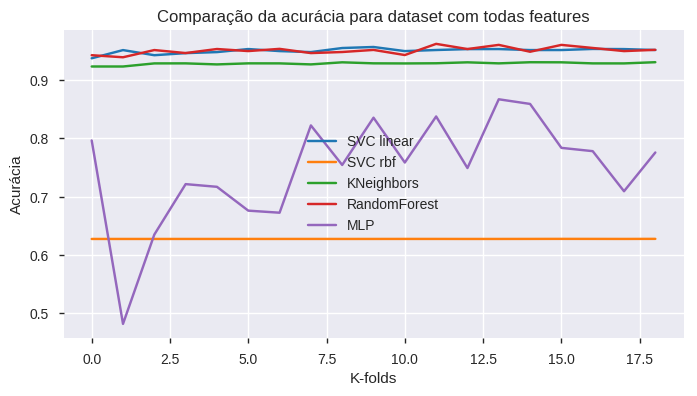

Média da acurácia em todos os folds
SVC linear: 0.9497141633016899
SVC brf: 0.6274539048263574
KNeighbors: 0.9277808629783046
RandomForest: 0.9502167388175827
MLP: 0.7486988486078655


In [93]:
plt.figure(figsize=[8,4])

acc_svc_linear = []
acc_svc_rbf = []
acc_kneighbors = []
acc_random_forest = []
acc_mlp = []

for fold in range(2, 21): 
    acc_svc_linear.append(cross_val_score(SVC(kernel='linear'), X, y, cv=fold).mean())
    acc_svc_rbf.append(cross_val_score(SVC(kernel='rbf'), X, y, cv=fold).mean())
    acc_kneighbors.append(cross_val_score(KNeighborsClassifier(), X, y, cv=fold).mean())
    acc_random_forest.append(cross_val_score(RandomForestClassifier(), X, y, cv=fold).mean())
    acc_mlp.append(cross_val_score(MLPClassifier(), X, y, cv=fold).mean())

plt.plot(acc_svc_linear, label='SVC linear')
plt.plot(acc_svc_rbf, label='SVC rbf')
plt.plot(acc_kneighbors, label='KNeighbors')
plt.plot(acc_random_forest, label='RandomForest')
plt.plot(acc_mlp, label='MLP')
plt.legend()
plt.ylabel('Acurácia')
plt.xlabel('K-folds')
plt.title('Comparação da acurácia para dataset com todas features')
plt.show()

print('Média da acurácia em todos os folds')
print('SVC linear:', np.array(acc_svc_linear).mean())
print('SVC brf:', np.array(acc_svc_rbf).mean())
print('KNeighbors:', np.array(acc_kneighbors).mean())
print('RandomForest:', np.array(acc_random_forest).mean())
print('MLP:', np.array(acc_mlp).mean())

In [ ]:
plt.figure(figsize=[8,4])

acc_svc_linear = []
acc_svc_rbf = []
acc_kneighbors = []
acc_random_forest = []
acc_mlp = []

for fold in range(2, 21): 
    acc_svc_linear.append(cross_val_score(SVC(kernel='linear'), X_st, y, cv=fold).mean())
    acc_svc_rbf.append(cross_val_score(SVC(kernel='rbf'), X_st, y, cv=fold).mean())
    acc_kneighbors.append(cross_val_score(KNeighborsClassifier(), X_st, y, cv=fold).mean())
    acc_random_forest.append(cross_val_score(RandomForestClassifier(), X_st, y, cv=fold).mean())
    acc_mlp.append(cross_val_score(MLPClassifier(), X_st, y, cv=fold).mean())

plt.plot(acc_svc_linear, label='SVC linear')
plt.plot(acc_svc_rbf, label='SVC rbf')
plt.plot(acc_kneighbors, label='KNeighbors')
plt.plot(acc_random_forest, label='RandomForest')
plt.plot(acc_mlp, label='MLP')
plt.legend()
plt.ylabel('Acurácia')
plt.xlabel('K-folds')
plt.title('Comparação da acurácia para dataset com todas features')
plt.show()

print('Média da acurácia em todos os folds')
print('SVC linear:', np.array(acc_svc_linear).mean())
print('SVC brf:', np.array(acc_svc_rbf).mean())
print('KNeighbors:', np.array(acc_kneighbors).mean())
print('RandomForest:', np.array(acc_random_forest).mean())
print('MLP:', np.array(acc_mlp).mean())

**GridSearch para o algoritmo SVC**

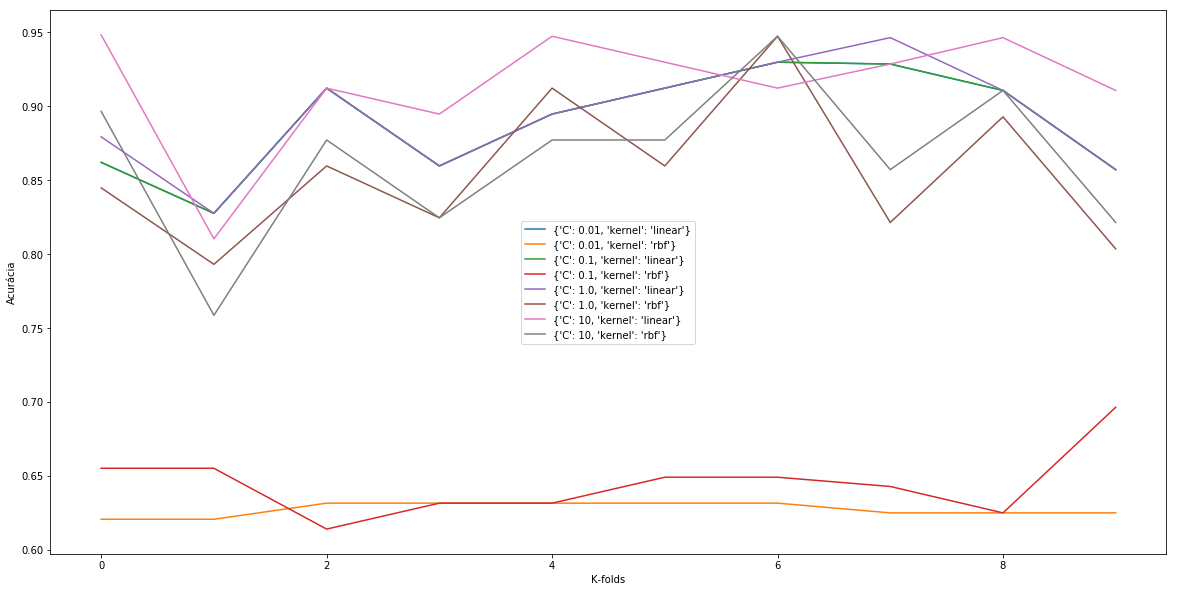

Melhor acurácia média 0.9138840070298769
Melhores parâmetros {'C': 10, 'kernel': 'linear'}


In [65]:
grid = GridSearchCV(SVC(), {'kernel': ['linear', 'rbf'], 'C':[0.01, 0.1, 1.0, 10]}, cv=10, scoring='accuracy')
grid.fit(X, y)

plt.figure(figsize=[20,10])

for k in range(len(grid.grid_scores_)):    
    plt.plot(grid.grid_scores_[k].cv_validation_scores, label=str(grid.grid_scores_[k].parameters))
    plt.legend()
    plt.ylabel('Acurácia')
    plt.xlabel('K-folds')
    
plt.show()

print('Melhor acurácia média', grid.best_score_)
print('Melhores parâmetros', grid.best_params_)

**GridSearch para o algoritmo KNeighborsClassifier**

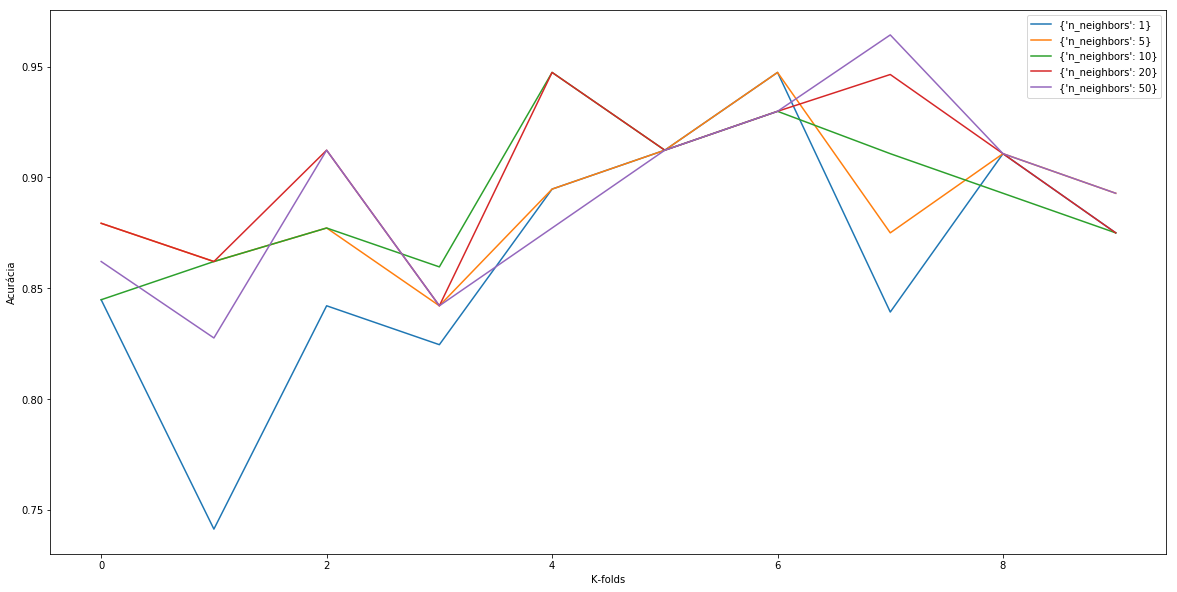

Melhor acurácia média 0.9015817223198594
Melhores parâmetros {'n_neighbors': 20}


In [66]:
grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [1, 5, 10, 20, 50]}, cv=10, scoring='accuracy')
grid.fit(X, y)

plt.figure(figsize=[20,10])

for k in range(len(grid.grid_scores_)):    
    plt.plot(grid.grid_scores_[k].cv_validation_scores, label=str(grid.grid_scores_[k].parameters))
    plt.legend()
    plt.ylabel('Acurácia')
    plt.xlabel('K-folds')
    
plt.show()

print('Melhor acurácia média', grid.best_score_)
print('Melhores parâmetros', grid.best_params_)

**GridSearch para o algoritmo RandomForestClassifier**

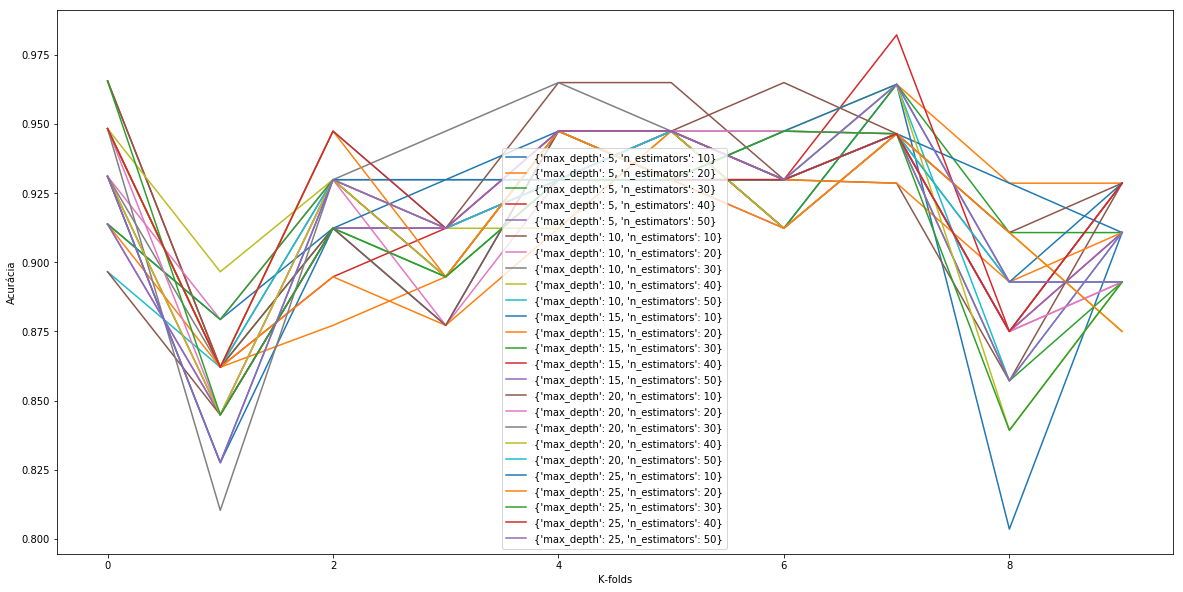

Melhor acurácia média 0.9244288224956063
Melhores parâmetros {'max_depth': 25, 'n_estimators': 40}


In [67]:
# RandomForest Parâmetros:

# n_estimators: Número de árvores aleatórias
# Valor default: 10

# max_features: Número de variáveis para considerar quando estiver olhando para a melhor divisão.
# Quando 'auto' o valor é a raíz quadrada do número de variáveis
# Valor default: 'auto'

# max_depth: A profundidade máxima da árvore. 
# Se for None, os nós serão expandidos até que todas as folhas fiquem puras 
# ou até que todas as folhas contenham menos de amostras de min_samples_split.
# Valor default: None

# min_samples_split: O número mínimo de amostras necessárias para dividir um nó interno
# Valor default: 2

plt.figure(figsize=[20,10])

grid = GridSearchCV(RandomForestClassifier(), {'max_depth': [5, 10, 15, 20, 25], 'n_estimators': [10, 20, 30, 40, 50]}, cv=10, scoring='accuracy')
grid.fit(X, y)

for k in range(len(grid.grid_scores_)):    
    plt.plot(grid.grid_scores_[k].cv_validation_scores, label=str(grid.grid_scores_[k].parameters))
    plt.legend()
    plt.ylabel('Acurácia')
    plt.xlabel('K-folds')
    
plt.show()

print('Melhor acurácia média', grid.best_score_)
print('Melhores parâmetros', grid.best_params_)

**GridSearch para o algoritmo MLPClassifier**

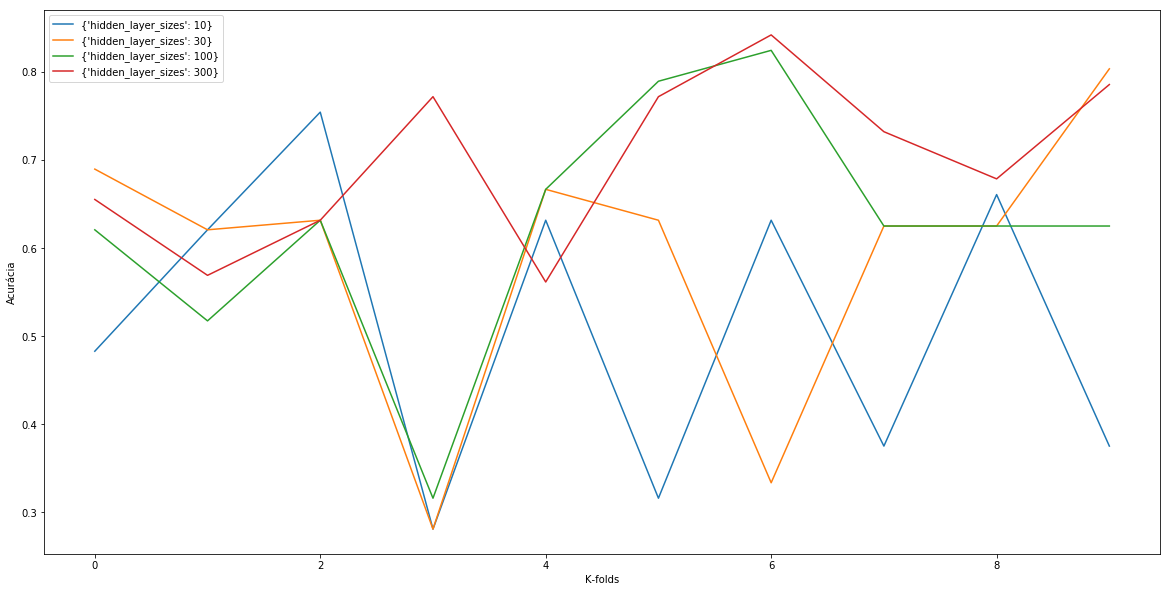

Melhor acurácia média 0.6994727592267135
Melhores parâmetros {'hidden_layer_sizes': 300}


In [68]:
grid = GridSearchCV(MLPClassifier(), {'hidden_layer_sizes': [10, 30, 100, 300]}, cv=10, scoring='accuracy')
grid.fit(X, y)

plt.figure(figsize=[20,10])

for k in range(len(grid.grid_scores_)):    
    plt.plot(grid.grid_scores_[k].cv_validation_scores, label=str(grid.grid_scores_[k].parameters))
    plt.legend()
    plt.ylabel('Acurácia')
    plt.xlabel('K-folds')
    
plt.show()

print('Melhor acurácia média', grid.best_score_)
print('Melhores parâmetros', grid.best_params_)